In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
ls '/gdrive/My Drive/imageClass'

Images/  train.csv  trained  trained1  trained2


In [0]:
import keras
from keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline


In [0]:
train = pd.read_csv(r'/gdrive/My Drive/imageClass/train.csv')


In [0]:
train_image=[]
for i in tqdm(range(train.shape[0])):
    img = image.load_img(r"/gdrive/My Drive/imageClass/Images/"+train['Id'][i]+'.jpg',target_size=(256,256,3))
    img = image.img_to_array(img)
    img=img/255
    train_image.append(img)
X = np.array(train_image)
del train_image

100%|██████████| 7254/7254 [40:46<00:00,  3.66it/s]


In [0]:
X.shape

(7254, 256, 256, 3)

In [0]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))
y.shape

(7254, 25)

In [0]:
del train

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
del X
del y

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32,verbose=1)

Train on 6528 samples, validate on 726 samples
Epoch 1/10
6528/6528 [==============================] - 1261s 193ms/step - loss: 0.3559 - acc: 0.8601 - val_loss: 0.2544 - val_acc: 0.9061
Epoch 2/10
6528/6528 [==============================] - 1237s 189ms/step - loss: 0.2694 - acc: 0.9049 - val_loss: 0.2430 - val_acc: 0.9061
Epoch 3/10
6528/6528 [==============================] - 1233s 189ms/step - loss: 0.2590 - acc: 0.9065 - val_loss: 0.2433 - val_acc: 0.9065
Epoch 4/10
6528/6528 [==============================] - 1262s 193ms/step - loss: 0.2544 - acc: 0.9075 - val_loss: 0.2428 - val_acc: 0.9061
Epoch 5/10
6528/6528 [==============================] - 1249s 191ms/step - loss: 0.2500 - acc: 0.9080 - val_loss: 0.2378 - val_acc: 0.9101
Epoch 6/10
6528/6528 [==============================] - 1250s 191ms/step - loss: 0.2476 - acc: 0.9082 - val_loss: 0.2383 - val_acc: 0.9095
Epoch 7/10
6528/6528 [==============================] - 1255s 192ms/step - loss: 0.2457 - acc: 0.9093 - val_loss: 0.239

In [0]:
model.save(r"/gdrive/My Drive/imageClass/TrainedModel")

In [2]:
from keras.models import load_model
model=load_model(r"/gdrive/My Drive/imageClass/TrainedModel")






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
%cd /gdrive/My Drive/imageClass

/gdrive/My Drive/imageClass


In [18]:
!l

avengers.jpeg  golmal.jpeg  GOT.jpg  Images  train.csv	TrainedModel


Comedy (0.646)
Drama (0.478)
Romance (0.237)


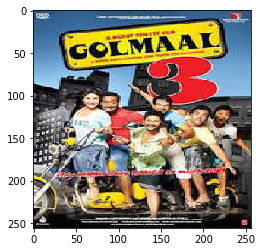

In [19]:
img = image.load_img("golmal.jpeg",target_size=(256,256,3))
img = image.img_to_array(img)
img = img/255
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,256,256,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)